# Data Extraction

In [111]:
#import all the data

import pandas as pd

c2018 = pd.read_csv("/Users/khairul/Downloads/cal_2018.csv")
c2020 = pd.read_csv("/Users/khairul/Downloads/cal_2020.csv")
c2022 = pd.read_csv("/Users/khairul/Downloads/cal_2022.csv")

# Data Cleansing

In [112]:
#since the column names is messy, rename the columns

#Label(Grouping) -> Label
#California Total Estimate -> Population
#California Labor Force Participation Rate Estimate -> Participation Rate
#California Employment/Population Ratio Estimate -> Employment Ratio
#California Unemployment Rate Estimate -> Unemployment Rate

c2018.columns = ["Label", "Population_18", "Participation_Rate_18", "Employment_Ratio_18", "Unemployment_Rate_18"]
c2020.columns = ["Label", "Population_20", "Participation_Rate_20", "Employment_Ratio_20", "Unemployment_Rate_20"]
c2022.columns = ["Label", "Population_22", "Participation_Rate_22", "Employment_Ratio_22", "Unemployment_Rate_22"]

In [114]:
#remove all missing data
#all missing data are due to grouping, there are no missing data on the statistics

c2018 = c2018.dropna()
c2020 = c2020.dropna()
c2022 = c2022.dropna()

In [115]:
#change all percentage data into numeric one
#remove '%' symbol and convert to float

c2018['Participation_Rate_18'] = c2018['Participation_Rate_18'].str.replace('%', '').astype(float)
c2018['Employment_Ratio_18'] = c2018['Employment_Ratio_18'].str.replace('%', '').astype(float)
c2018['Unemployment_Rate_18'] = c2018['Unemployment_Rate_18'].str.replace('%', '').astype(float)

c2020['Participation_Rate_20'] = c2020['Participation_Rate_20'].str.replace('%', '').astype(float)
c2020['Employment_Ratio_20'] = c2020['Employment_Ratio_20'].str.replace('%', '').astype(float)
c2020['Unemployment_Rate_20'] = c2020['Unemployment_Rate_20'].str.replace('%', '').astype(float)

c2022['Participation_Rate_22'] = c2022['Participation_Rate_22'].str.replace('%', '').astype(float)
c2022['Employment_Ratio_22'] = c2022['Employment_Ratio_22'].str.replace('%', '').astype(float)
c2022['Unemployment_Rate_22'] = c2022['Unemployment_Rate_22'].str.replace('%', '').astype(float)

# Exploratory Data Analysis

In [151]:
#we want to predict unemployment rate on 2024 using linear regression

#filter using iloc and indexing

dummy = cal_empl_stat.iloc[31:]
selected_2 = dummy[["Label", "Unemployment_Rate_18", "Unemployment_Rate_20", "Unemployment_Rate_22"]]

#melt the data for long format

melted_data = pd.melt(selected_2, id_vars='Label', var_name='Year', value_name='Unemployment Rate')
melted_data['Year'] = melted_data['Year'].str.extract('(\d+)').astype(int)

from sklearn.linear_model import LinearRegression

models = {}
predictions_2024 = {}

for label in melted_data['Label'].unique():
    subset = melted_data[melted_data['Label'] == label]
    X = subset[['Year']]
    y = subset['Unemployment Rate']
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model
    models[label] = model
    
    # Predict for 2024
    predictions_2024[label] = model.predict([[24]])[0]

# Display the predictions
predictions = pd.DataFrame.from_dict(predictions_2024, orient='index', columns=['Predicted Unemployment Rate 2024'])
predictions

/Users/khairul/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/khairul/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/khairul/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/khairul/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Predicted Unemployment Rate 2024
Less than high school graduate,7.000000
High school graduate (includes equivalency),6.566667
Some college or associate's degree,6.100000
Bachelor's degree or higher,3.966667


### Discussion

- Bachelor's degree holder unemployment rate increases slightly, differs 0.07 from 2022, shows a slight recovery compared to difference of 0.2 between 2022 to 2020

- Associate's degree holder unemployment rate increases by 0.6, worsen a bit, because of high supply of associate's degree graduates

- High school graduate unemployment rate increases slightly by 0.07, suggesting strong job security in the industries

- Non-high school graduate unemployment rate decrease by 0.4, indicating more startup or retail stores opening after pandemic outbreak since there are a lot of oppoturnities

# Data Visualization

In [110]:
#left join all data

dummy = c2018.merge(c2020, how='left')
cal_empl_stat = dummy.merge(c2022, how='left')

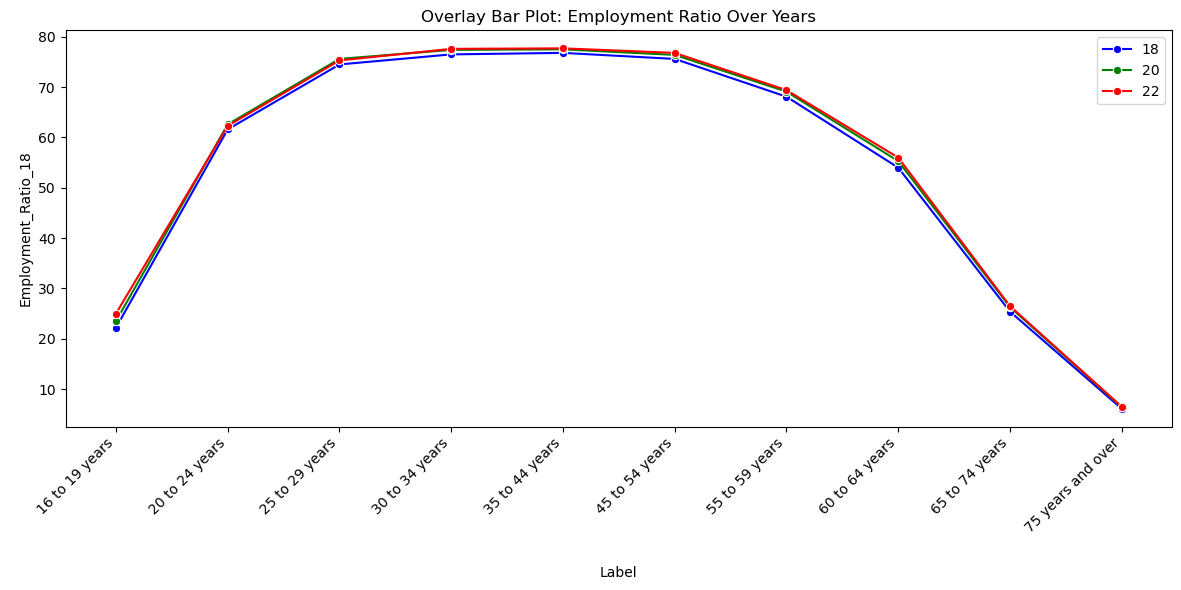

In [109]:
#we want to compare the differences between employment ratio between ages

import seaborn as sns
import matplotlib.pyplot as plt

#filter using iloc

selected_1 = cal_empl_stat.iloc[1:11]

plt.figure(figsize=(12, 6))
sns.lineplot(data = selected_1, x = 'Label', y = "Employment_Ratio_18", color = 'b', label = "18", marker = 'o')
sns.lineplot(data = selected_1, x = 'Label', y = "Employment_Ratio_20", color = 'g', label = "20", marker = 'o')
sns.lineplot(data = selected_1, x = 'Label', y = "Employment_Ratio_22", color = 'r', label = "22", marker = 'o')
plt.title('Overlay Bar Plot: Employment Ratio Over Years')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Discussion

- We can conclude that after facing challenges during pandemic outbreak, california experience economic growth

- Therefore, after pandemic outbreak, labor market conditions and consumer spending increases

- Common factor may be that the goverment and public rapidly adapt to a new system that prevents the economy of the state to shut down completely

- Meanwhile, labor force between 20 to 29 years old facing some challenge in employment, due to high supply of labor force but low demand from private sector